# CART

## 1- calcul du gain d'impureté de chaque variable et selection de la variable qui maximise le gain d'impureté
## 2- Determination du seuil de division qui maximise le gain d'impureté ou qui minimise la loss. Avec CART on a que deux choix possible dans les divisions par neouds. si c'est inferieur au seuil, on met a gauche, sinon on le met a droite.
## 3- Decoupage de l'arbre
## 4- Pruning pour faire l'elargage de l'arbre car il ne faut pas avoir un arbre trop profond car les données risque d'etre individuel et ce qui caracterise le sur-apprentissage et il faut egalement eviter le sous-apprentissage avec un arbre peu profond

# 1- Importation des bibliotheques et netoyages des données

## 1-1- Importation des bibliotheques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, export_text
from sklearn.metrics import accuracy_score, precision_score, classification_report


## 1-2- Importation et description des données
Le jeu de données est disponible dans **seaborn** mais pour des taches externes, il est telechargeable a l'adresse suivante: **https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv**

In [2]:
df_titanic = sns.load_dataset("titanic")
df_titanic.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:
df_titanic.describe(include = "all")


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1-3- Nettoyages des données

In [4]:
df_titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
age_mean = int(df_titanic["age"].mean())

In [6]:
age_mean

29

In [7]:
df_titanic["age"].fillna(age_mean, inplace = True)
df_titanic.isnull().sum()

C:\Users\Christian\AppData\Local\Temp\ipykernel_21176\411244021.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic["age"].fillna(age_mean, inplace = True)


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
df_titanic['deck'] = df_titanic['deck'].astype('category')
df_titanic['deck'] = df_titanic['deck'].cat.add_categories('Unknown')
df_titanic['deck'].fillna('Unknown', inplace=True)
df_titanic.isnull().sum()


C:\Users\Christian\AppData\Local\Temp\ipykernel_21176\3852242487.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['deck'].fillna('Unknown', inplace=True)


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [9]:
df_titanic["embarked"].fillna("S", inplace = True)
df_titanic["embark_town"].fillna("Southampton", inplace = True)
df_titanic.isnull().sum()


C:\Users\Christian\AppData\Local\Temp\ipykernel_21176\1517652926.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic["embarked"].fillna("S", inplace = True)
C:\Users\Christian\AppData\Local\Temp\ipykernel_21176\1517652926.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

# 2- Analyses des données

# 2-1- Analyses univariées

In [10]:
variables_qualitatives = df_titanic.select_dtypes(include=["object", "category","bool"]).columns.tolist()
variables_quantitatives = df_titanic.select_dtypes(include=[int, float]).columns.tolist()
target = "survived"
variables_quantitatives = [col for col in variables_quantitatives if col != target]
df_titanic[target] = df_titanic["survived"]
print(variables_qualitatives)
print(variables_quantitatives)
print(target)


['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
['pclass', 'age', 'sibsp', 'parch', 'fare']
survived


C:\Users\Christian\AppData\Local\Temp\ipykernel_21176\2878604317.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variables_qualitatives_df[column], ax=axs[0], palette="viridis")


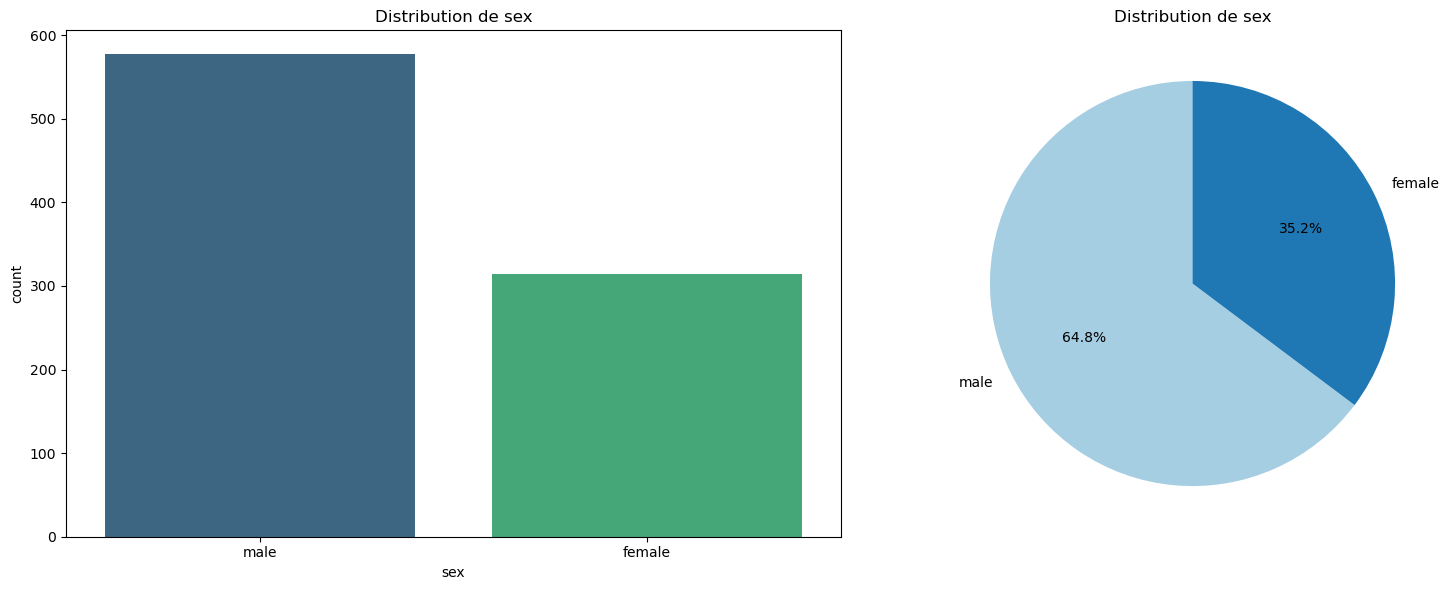

C:\Users\Christian\AppData\Local\Temp\ipykernel_21176\2878604317.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variables_qualitatives_df[column], ax=axs[0], palette="viridis")


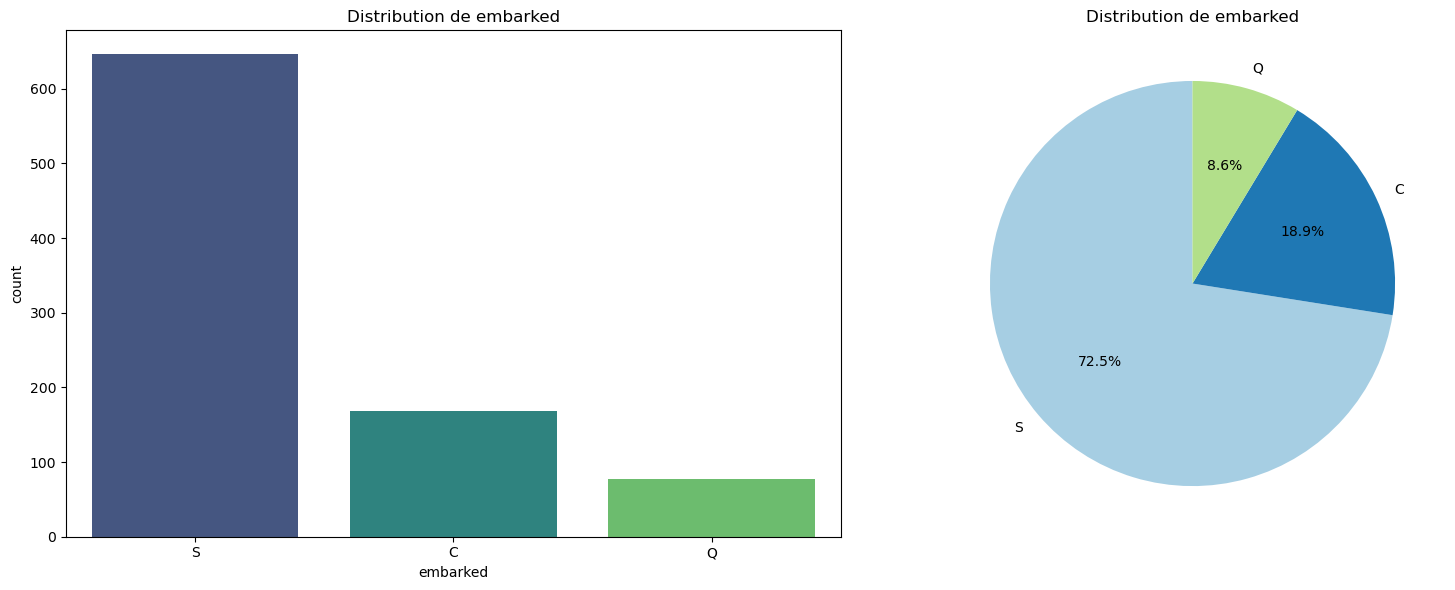

C:\Users\Christian\AppData\Local\Temp\ipykernel_21176\2878604317.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variables_qualitatives_df[column], ax=axs[0], palette="viridis")


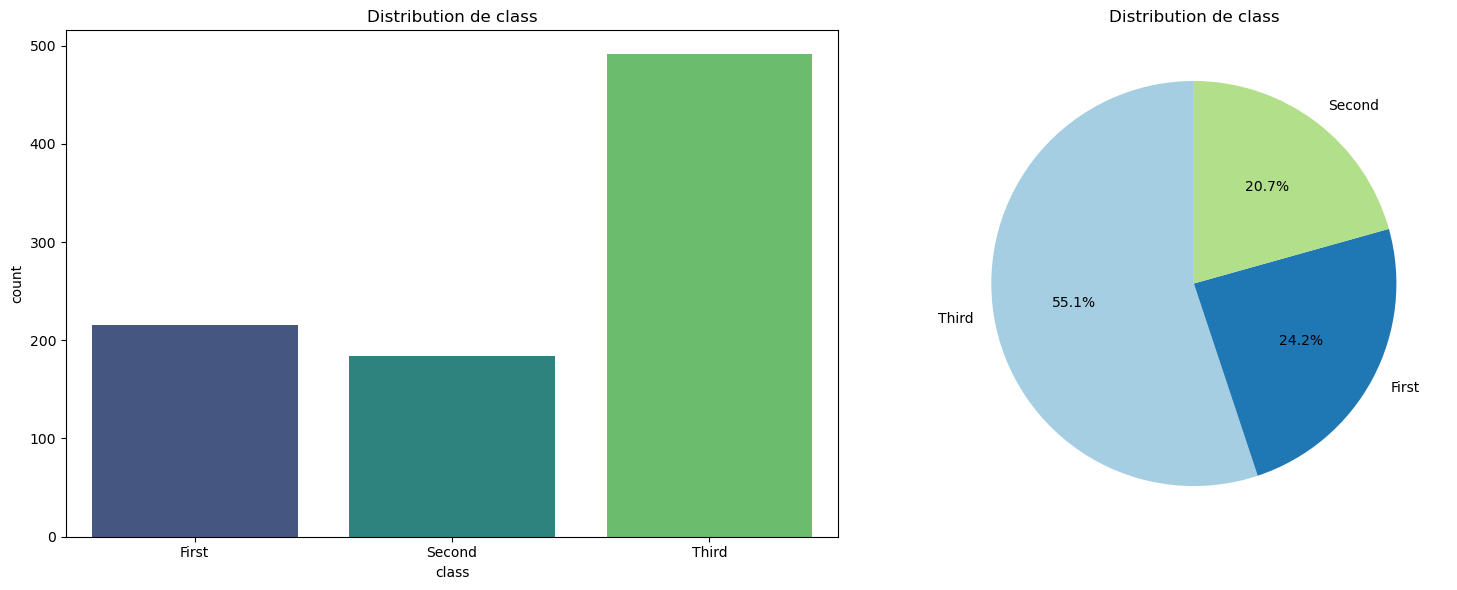

C:\Users\Christian\AppData\Local\Temp\ipykernel_21176\2878604317.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variables_qualitatives_df[column], ax=axs[0], palette="viridis")


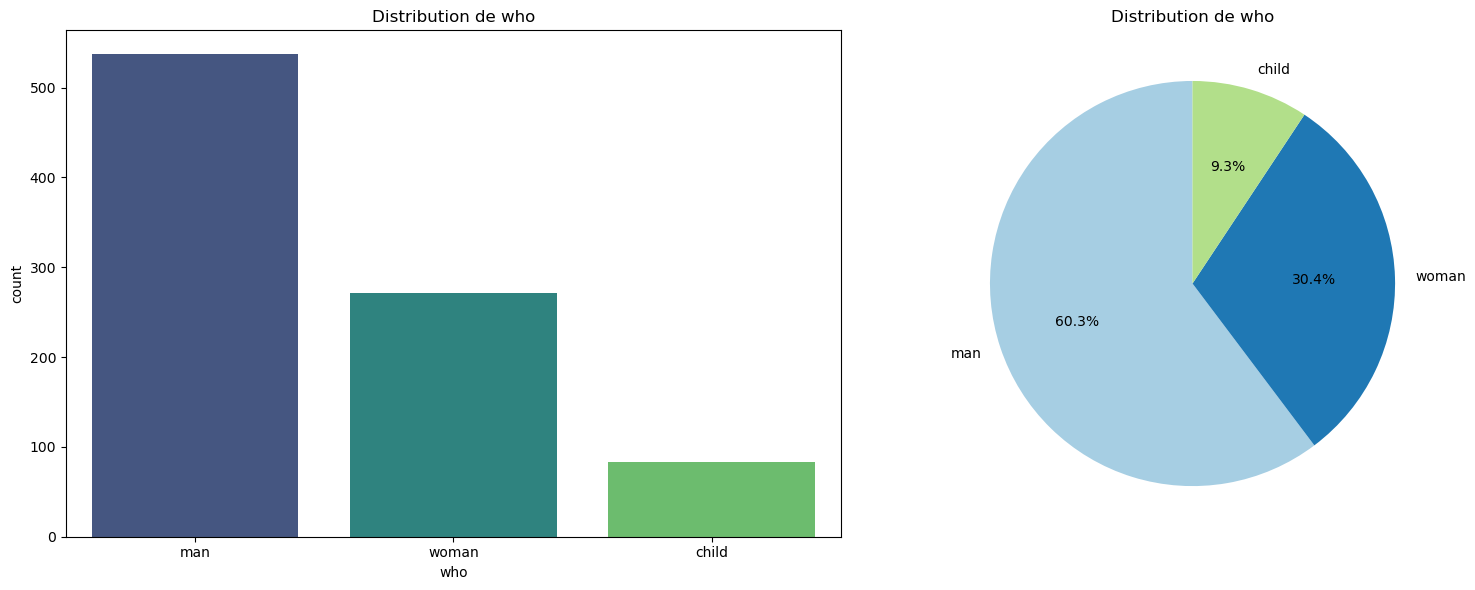

C:\Users\Christian\AppData\Local\Temp\ipykernel_21176\2878604317.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variables_qualitatives_df[column], ax=axs[0], palette="viridis")


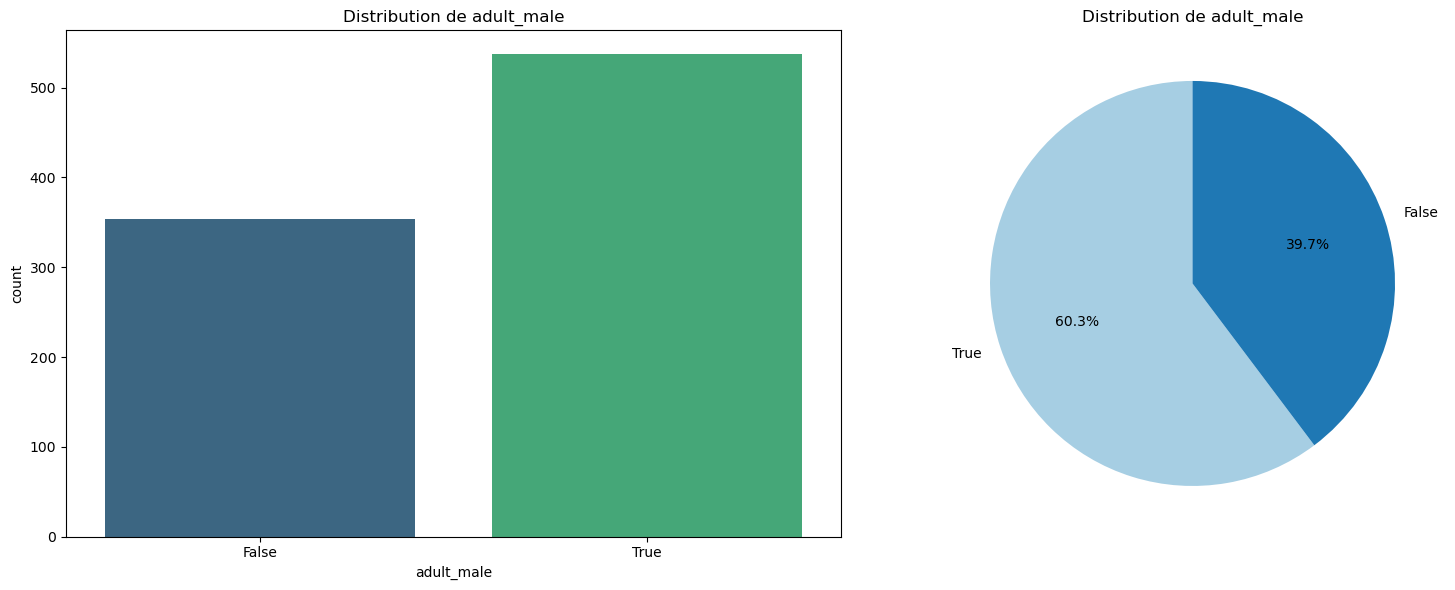

C:\Users\Christian\AppData\Local\Temp\ipykernel_21176\2878604317.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variables_qualitatives_df[column], ax=axs[0], palette="viridis")


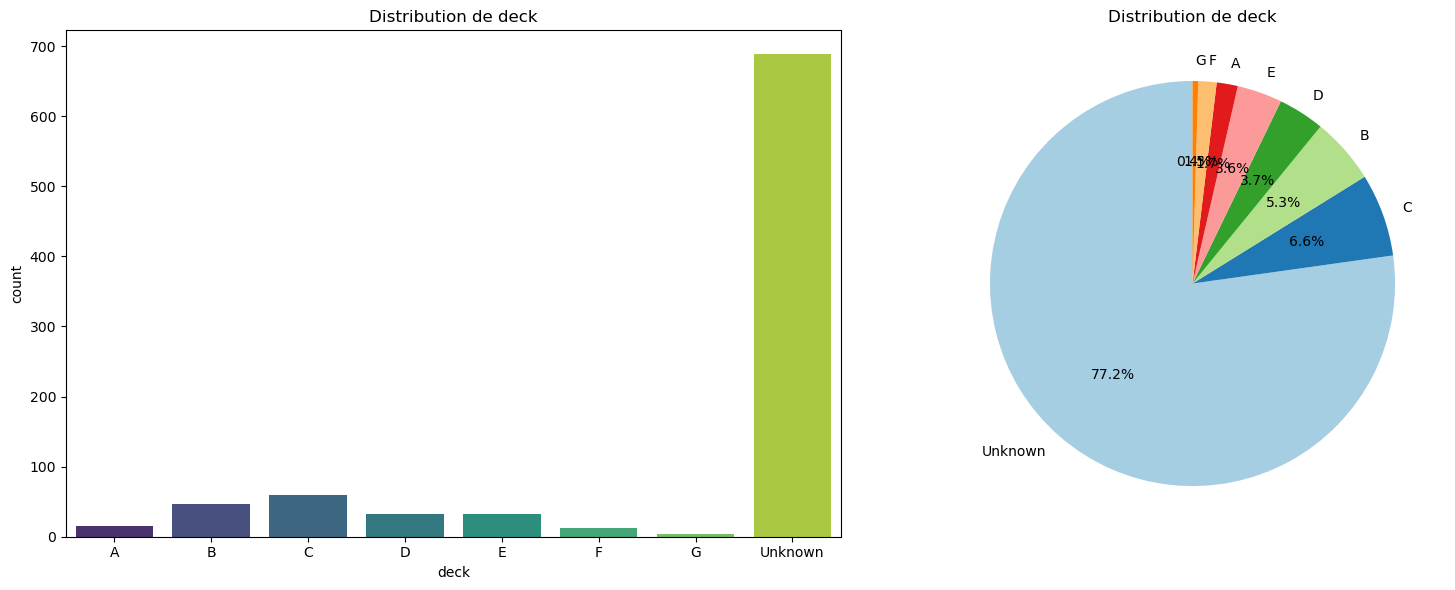

C:\Users\Christian\AppData\Local\Temp\ipykernel_21176\2878604317.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variables_qualitatives_df[column], ax=axs[0], palette="viridis")


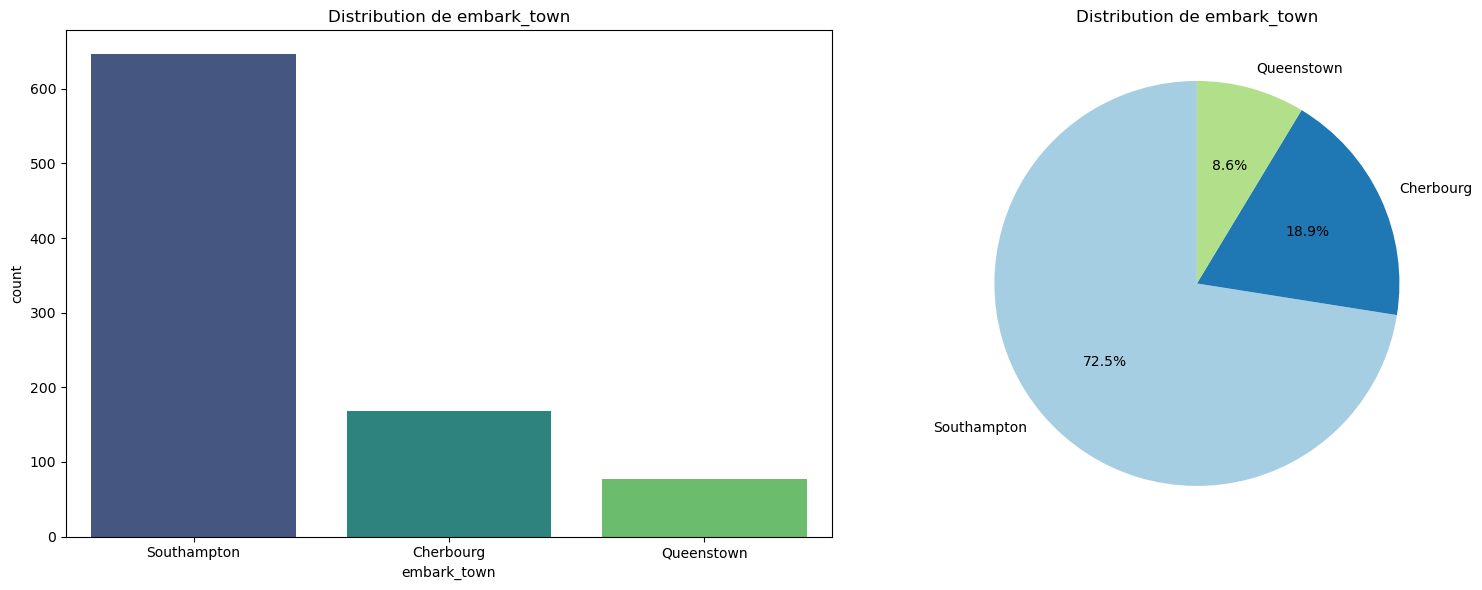

C:\Users\Christian\AppData\Local\Temp\ipykernel_21176\2878604317.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variables_qualitatives_df[column], ax=axs[0], palette="viridis")


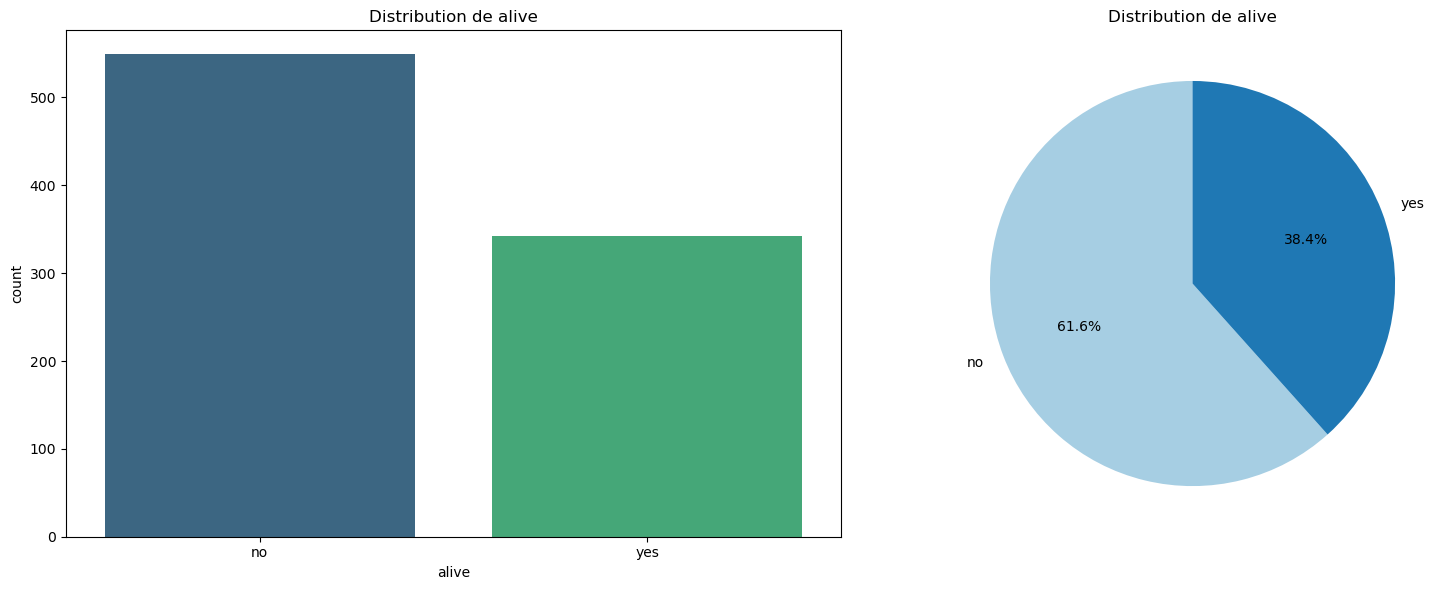

C:\Users\Christian\AppData\Local\Temp\ipykernel_21176\2878604317.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variables_qualitatives_df[column], ax=axs[0], palette="viridis")


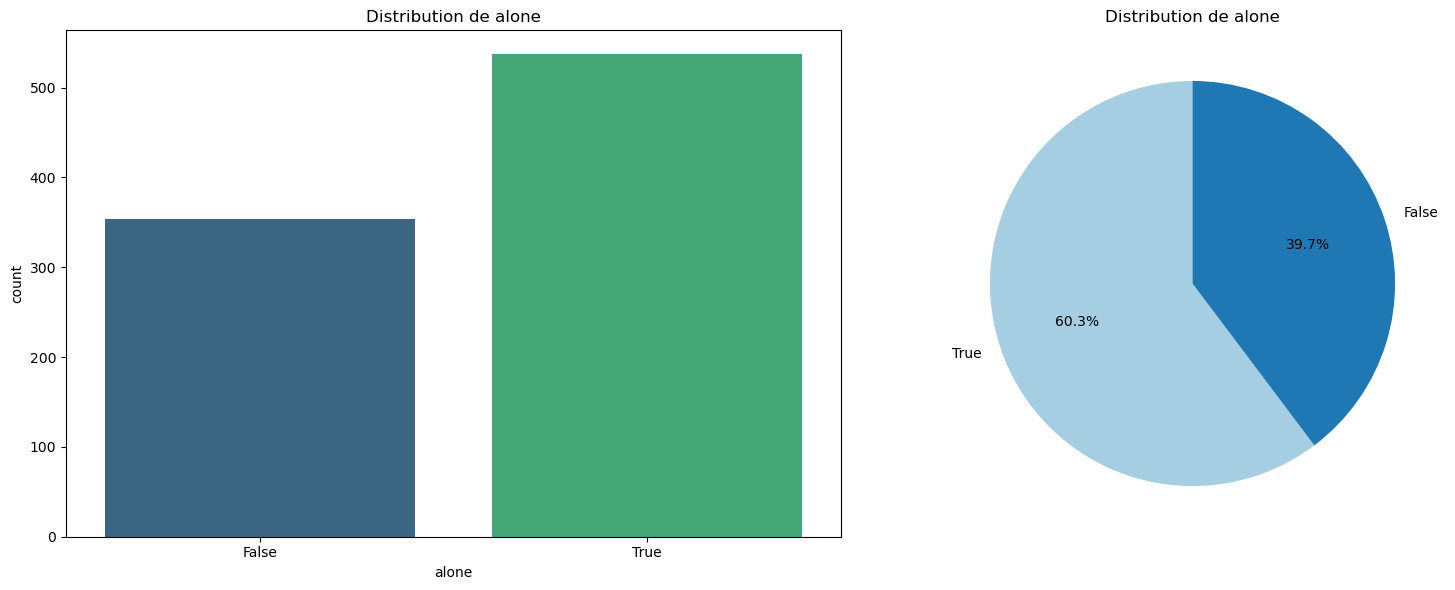

In [11]:
# DataFrame contenant les variables qualitatives
variables_qualitatives_df = df_titanic[["sex", "embarked", "class", "who", "adult_male", "deck", "embark_town", "alive", "alone"]]

for column in variables_qualitatives_df.columns:
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    sns.countplot(x=variables_qualitatives_df[column], ax=axs[0], palette="viridis")
    axs[0].set_title(f'Distribution de {column}')
    variables_qualitatives_df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, ax=axs[1])
    axs[1].set_ylabel('')
    axs[1].set_title(f'Distribution de {column}')
    
    plt.tight_layout()
    plt.show()


C:\Users\Christian\AppData\Local\Temp\ipykernel_21176\3289157425.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=variables_quantitatives_df[column], ax=axs[0], palette="viridis")


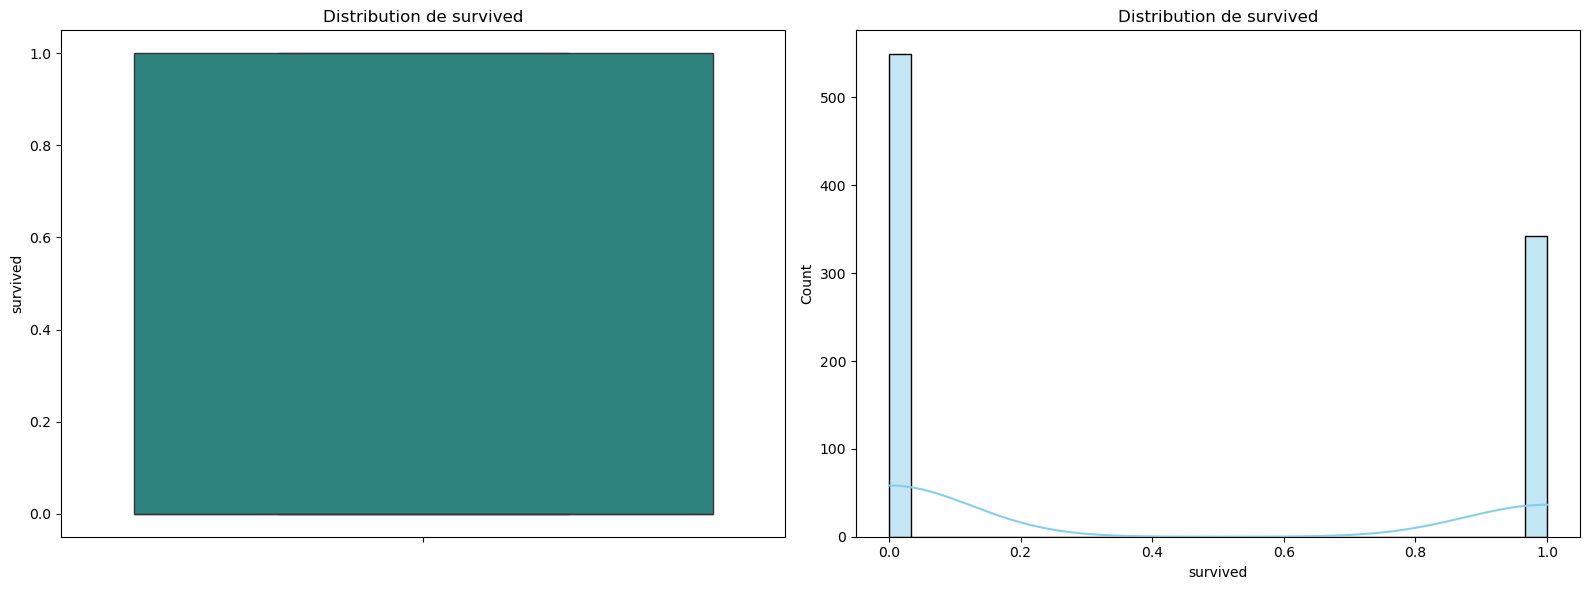

C:\Users\Christian\AppData\Local\Temp\ipykernel_21176\3289157425.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=variables_quantitatives_df[column], ax=axs[0], palette="viridis")


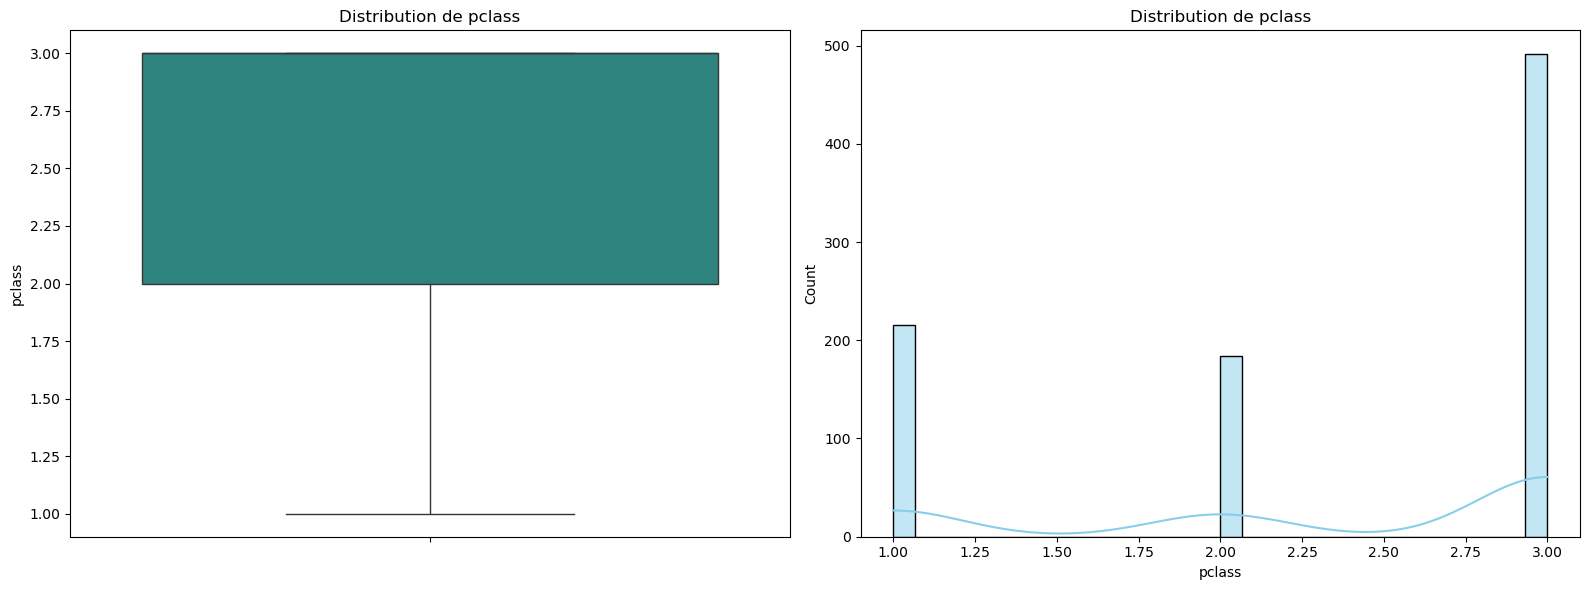

C:\Users\Christian\AppData\Local\Temp\ipykernel_21176\3289157425.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=variables_quantitatives_df[column], ax=axs[0], palette="viridis")


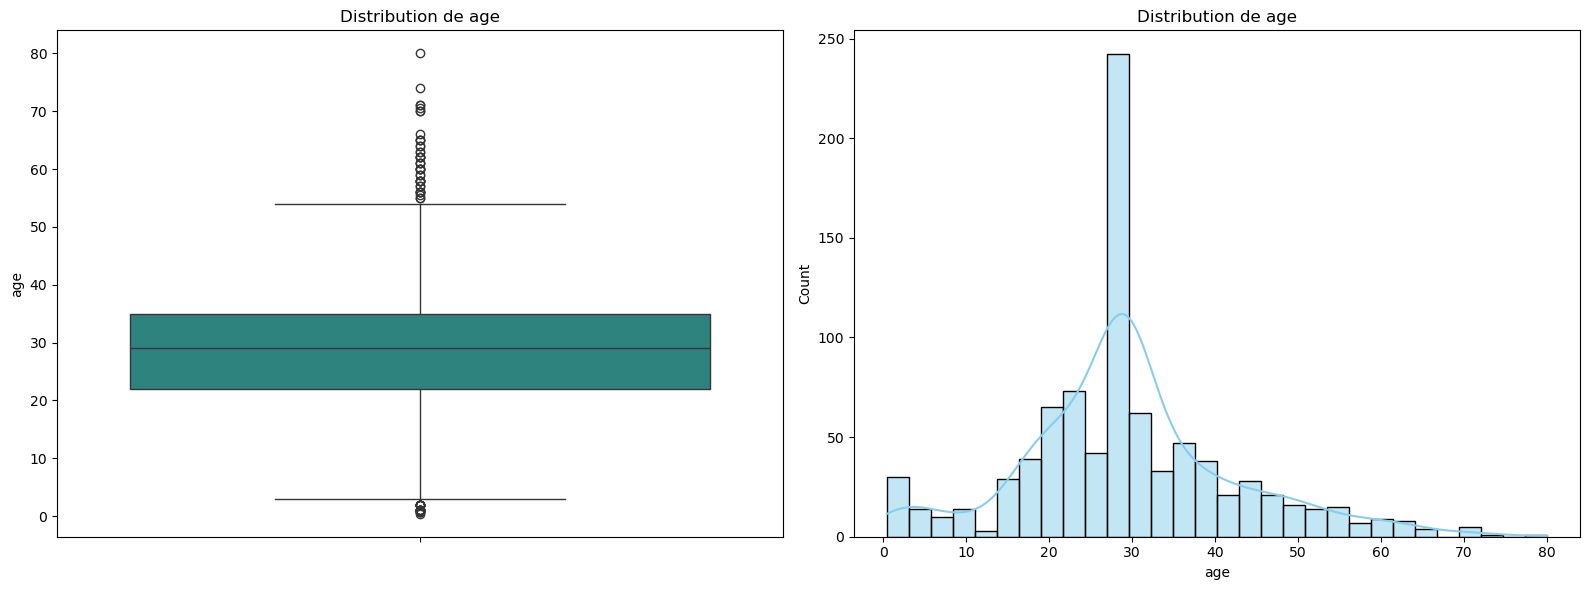

C:\Users\Christian\AppData\Local\Temp\ipykernel_21176\3289157425.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=variables_quantitatives_df[column], ax=axs[0], palette="viridis")


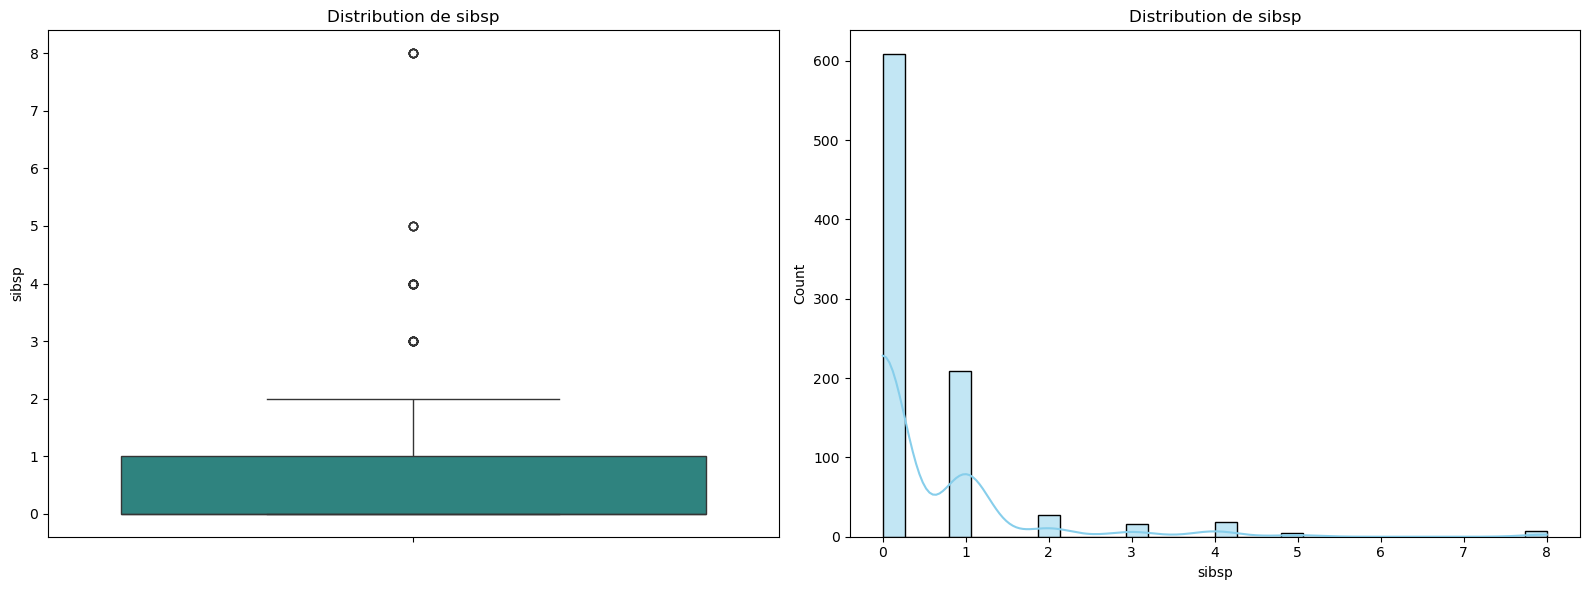

C:\Users\Christian\AppData\Local\Temp\ipykernel_21176\3289157425.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=variables_quantitatives_df[column], ax=axs[0], palette="viridis")


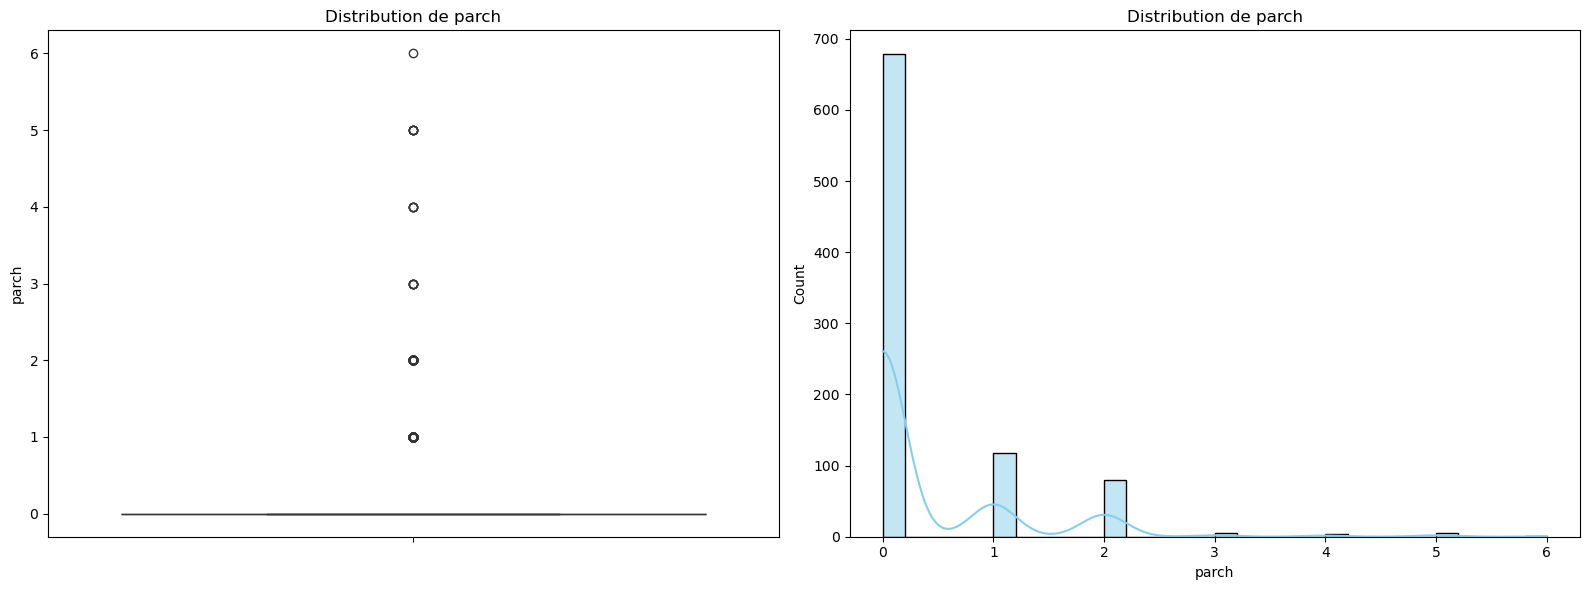

C:\Users\Christian\AppData\Local\Temp\ipykernel_21176\3289157425.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=variables_quantitatives_df[column], ax=axs[0], palette="viridis")


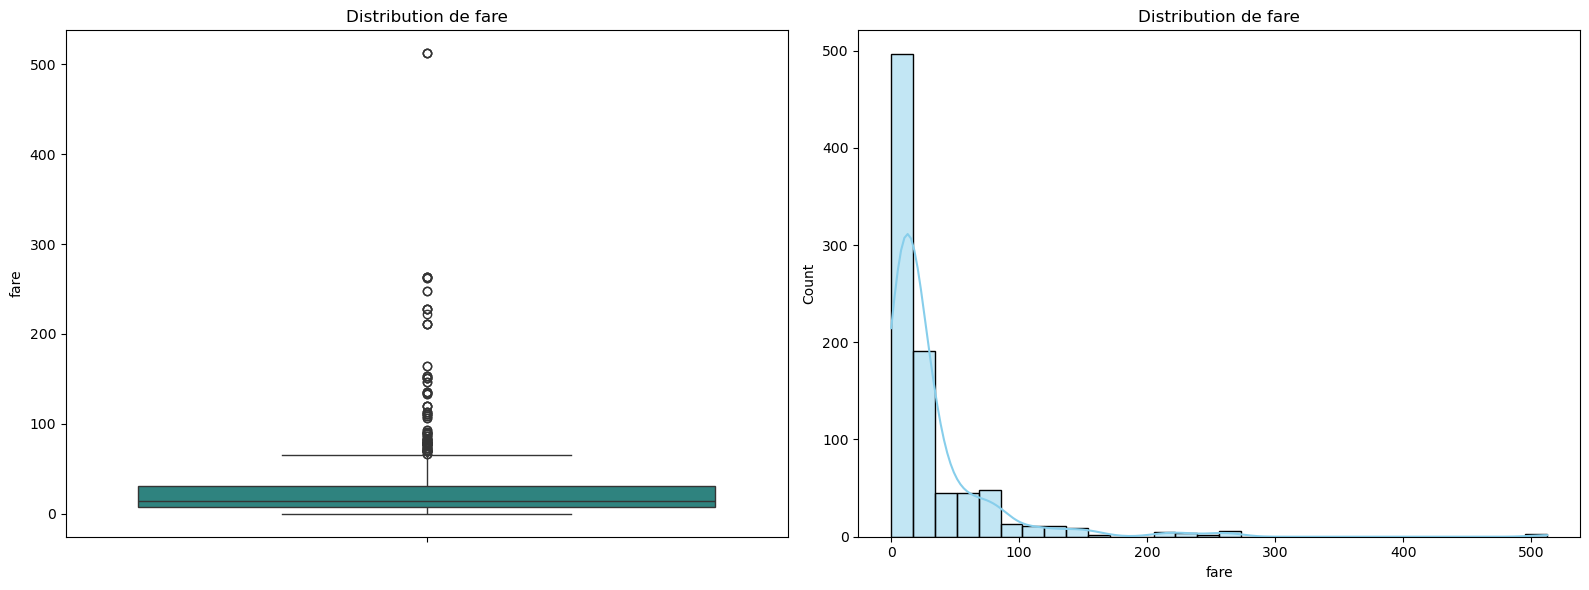

In [12]:
variables_quantitatives_df = df_titanic[["survived","pclass","age","sibsp","parch","fare"]]

for column in variables_quantitatives_df.columns:
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    sns.boxplot(y=variables_quantitatives_df[column], ax=axs[0], palette="viridis")
    axs[0].set_title(f'Distribution de {column}')
    sns.histplot(variables_quantitatives_df[column], bins=30, kde=True, ax=axs[1], color='skyblue')
    axs[1].set_title(f'Distribution de {column}')
    axs[1].set_xlabel(column)
    
    plt.tight_layout()
    plt.show()


# 2-2- Analyse bivariées

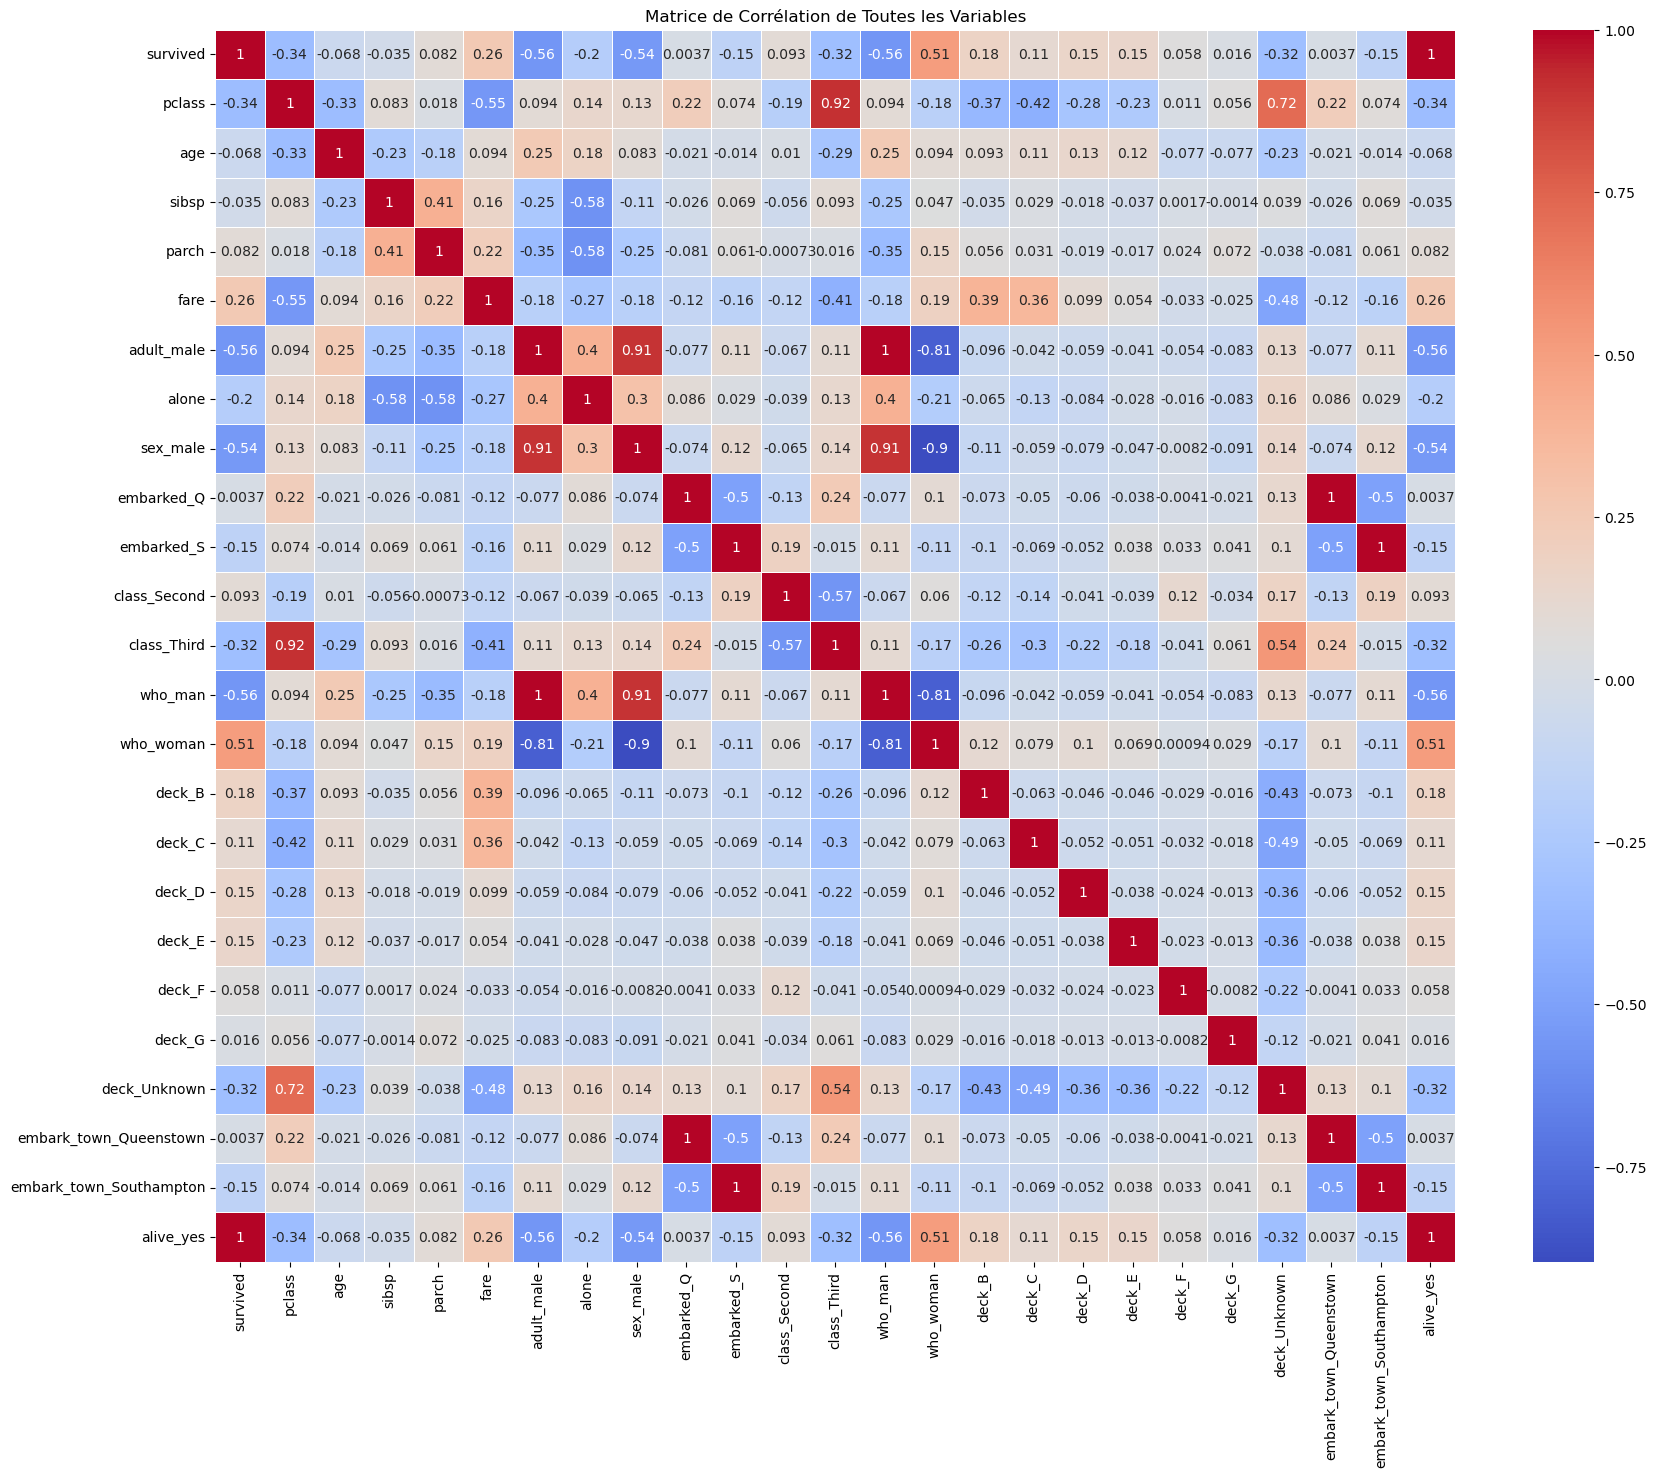

In [13]:
titanic_data_encoded = pd.get_dummies(df_titanic, drop_first=True)

# Calculer la matrice de corrélation entre toutes les variables
correlation_matrix = titanic_data_encoded.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(20, 16)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5) 
plt.title('Matrice de Corrélation de Toutes les Variables') 
plt.show()

# 3- Construction de l'arbre 

## 3-1- Contruction de l'Arbre avec toutes les variables

Le but est de determiner les variables qui ont un impact significativement reductif de l'entropie ou de l'indice de Gini

### 3-1-1- Preparation des données

In [14]:
# Préparation des données
X = df_titanic[variables_qualitatives + variables_quantitatives]
y = df_titanic[target]

# decoupages des données en 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du preprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), variables_qualitatives),
        ('num', 'passthrough', variables_quantitatives)
    ])
X

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone,pclass,age,sibsp,parch,fare
0,male,S,Third,man,True,Unknown,Southampton,no,False,3,22.0,1,0,7.2500
1,female,C,First,woman,False,C,Cherbourg,yes,False,1,38.0,1,0,71.2833
2,female,S,Third,woman,False,Unknown,Southampton,yes,True,3,26.0,0,0,7.9250
3,female,S,First,woman,False,C,Southampton,yes,False,1,35.0,1,0,53.1000
4,male,S,Third,man,True,Unknown,Southampton,no,True,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,Unknown,Southampton,no,True,2,27.0,0,0,13.0000
887,female,S,First,woman,False,B,Southampton,yes,True,1,19.0,0,0,30.0000
888,female,S,Third,woman,False,Unknown,Southampton,no,False,3,29.0,1,2,23.4500
889,male,C,First,man,True,C,Cherbourg,yes,True,1,26.0,0,0,30.0000


### 3-1-2-Création de l'arbre et visualisation de l'arbre


In [15]:
decision_tree = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Entraînement du modèle
decision_tree.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'embarked', 'class',
                                                   'who', 'adult_male', 'deck',
                                                   'embark_town', 'alive',
                                                   'alone']),
                                                 ('num', 'passthrough',
                                                  ['pclass', 'age', 'sibsp',
                                                   'parch', 'fare'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

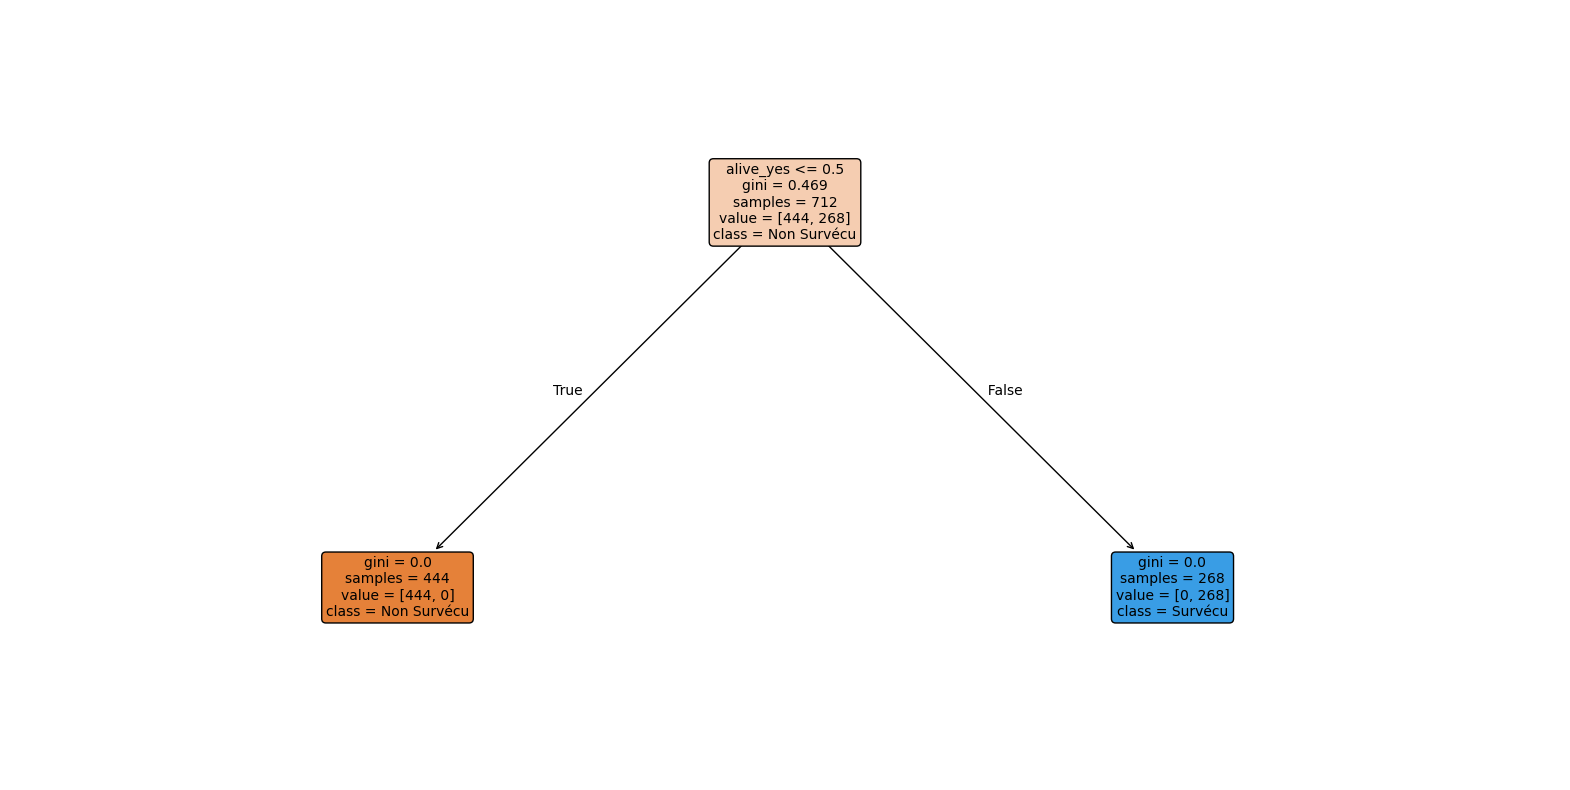

In [16]:
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(variables_qualitatives).tolist()
feature_names_encoded = cat_feature_names + variables_quantitatives

# Méthode 1 : Visualisation graphique
plt.figure(figsize=(20,10))
plot_tree(decision_tree.named_steps['classifier'], 
          feature_names= feature_names_encoded, 
          class_names=['Non Survécu', 'Survécu'],
          filled=True,  
          rounded=True, 
          fontsize=10)
plt.show()


In [17]:
# Méthode 2 : Représentation textuelle de l'arbre
tree_rules = export_text(decision_tree.named_steps['classifier'], 
                         feature_names=feature_names_encoded)
print(tree_rules)


|--- alive_yes <= 0.50
|   |--- class: 0
|--- alive_yes >  0.50
|   |--- class: 1



# 3-1-3- Evaluation et conclusion des resultats

In [18]:
# Prédictions
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

# Calcul de la précision
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("\nPrécision sur l'ensemble d'entraînement :", precision_train)
print("Précision sur l'ensemble de test :", precision_test)
print("\nAccuracy sur l'ensemble d'entraînement :", accuracy_train)
print("Accuracy sur l'ensemble de test :", accuracy_test)
print("Rapport de Classification :\n", classification_report(y_test, y_test_pred))



Précision sur l'ensemble d'entraînement : 1.0
Précision sur l'ensemble de test : 1.0

Accuracy sur l'ensemble d'entraînement : 1.0
Accuracy sur l'ensemble de test : 1.0
Rapport de Classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [19]:
# Visualisation de l'importance des caractéristiques
feature_names = (
    preprocessor.named_transformers_['cat'].get_feature_names_out(variables_qualitatives).tolist() + 
    variables_quantitatives
)

importances = decision_tree.named_steps['classifier'].feature_importances_
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

print("\nImportance des caractéristiques :")
print(feature_importance.head(10))



Importance des caractéristiques :
        feature  importance
25    alive_yes         1.0
0    sex_female         0.0
17       deck_E         0.0
31        parch         0.0
30        sibsp         0.0
29          age         0.0
28       pclass         0.0
27   alone_True         0.0
26  alone_False         0.0
24     alive_no         0.0


De part cette analyse on peut conclure que le modele est parfait car il a une bonne taille et il ne sur-apprend pas. Mais ces resultats sont obtenu parceque nous avons une colone dont le le coef de correlation avec notre cible est 1. En effet la variable **alive** n'est qu'une reformulation de notre cible. Nous allons donc refaire cette analyse car c'est cette variable qui explique notre decision et ce n'est pas du tout interessant pour nous.

## 3-2- Arbre en supprimant la variable alive.

### 3-2-1- Selection et preparations des variables

In [20]:
variables_qualitatives = df_titanic.select_dtypes(include=["object", "category","bool"]).columns.tolist()
variables_qualitatives.remove("alive")
variables_quantitatives = df_titanic.select_dtypes(include=[int, float]).columns.tolist()
target = "survived"
variables_quantitatives = [col for col in variables_quantitatives if col != target]
df_titanic[target] = df_titanic["survived"]
print(variables_qualitatives)
print(variables_quantitatives)
print(target)


['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alone']
['pclass', 'age', 'sibsp', 'parch', 'fare']
survived


In [21]:
# Préparation des données
X = df_titanic[variables_qualitatives + variables_quantitatives]
y = df_titanic[target]

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du preprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), variables_qualitatives),
        ('num', 'passthrough', variables_quantitatives)
    ])
X


,sex,embarked,class,who,adult_male,deck,embark_town,alone,pclass,age,sibsp,parch,fare
0,male,S,Third,man,True,Unknown,Southampton,False,3,22.0,1,0,7.2500
1,female,C,First,woman,False,C,Cherbourg,False,1,38.0,1,0,71.2833
2,female,S,Third,woman,False,Unknown,Southampton,True,3,26.0,0,0,7.9250
3,female,S,First,woman,False,C,Southampton,False,1,35.0,1,0,53.1000
4,male,S,Third,man,True,Unknown,Southampton,True,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,Unknown,Southampton,True,2,27.0,0,0,13.0000
887,female,S,First,woman,False,B,Southampton,True,1,19.0,0,0,30.0000
888,female,S,Third,woman,False,Unknown,Southampton,False,3,29.0,1,2,23.4500
889,male,C,First,man,True,C,Cherbourg,True,1,26.0,0,0,30.0000


### 3-2-2- Construction de l'arbre

In [22]:
# Création du pipeline
decision_tree = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Entraînement du modèle
decision_tree.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'embarked', 'class',
                                                   'who', 'adult_male', 'deck',
                                                   'embark_town', 'alone']),
                                                 ('num', 'passthrough',
                                                  ['pclass', 'age', 'sibsp',
                                                   'parch', 'fare'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

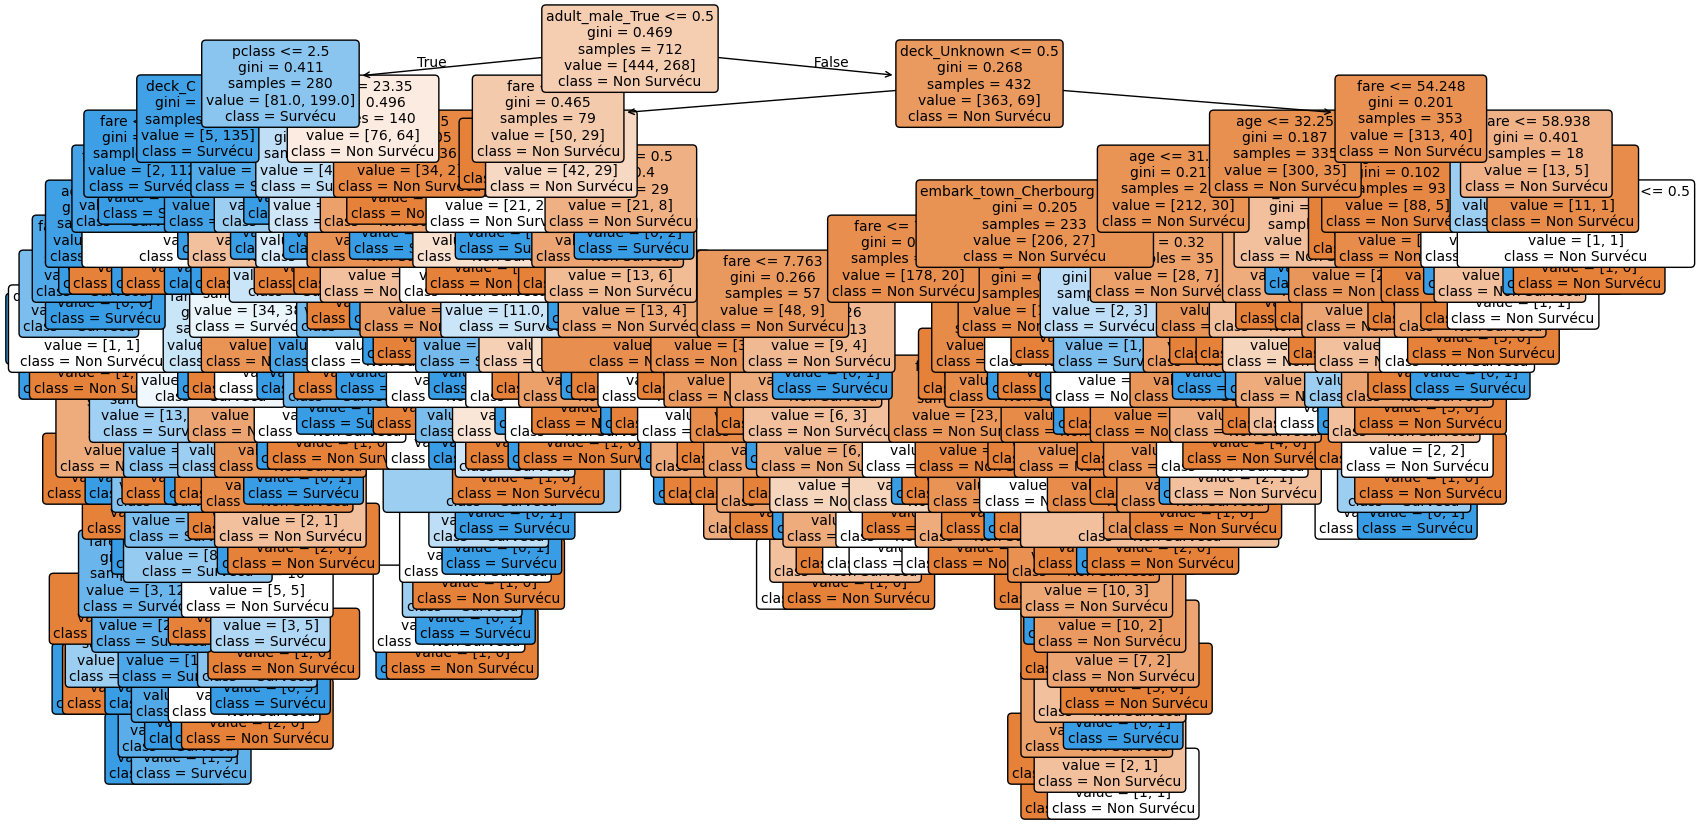

In [23]:
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(variables_qualitatives).tolist()
feature_names_encoded = cat_feature_names + variables_quantitatives

# Méthode 1 : Visualisation graphique
plt.figure(figsize=(20,10))
plot_tree(decision_tree.named_steps['classifier'], 
          feature_names= feature_names_encoded, 
          class_names=['Non Survécu', 'Survécu'],
          filled=True,  
          rounded=True, 
          fontsize=10)
plt.show()


In [24]:
# Méthode 2 : Représentation textuelle de l'arbre
tree_rules = export_text(decision_tree.named_steps['classifier'], 
                         feature_names=feature_names_encoded)
print(tree_rules)


|--- adult_male_True <= 0.50
|   |--- pclass <= 2.50
|   |   |--- deck_C <= 0.50
|   |   |   |--- fare <= 22.00
|   |   |   |   |--- fare <= 20.25
|   |   |   |   |   |--- age <= 25.50
|   |   |   |   |   |   |--- fare <= 13.40
|   |   |   |   |   |   |   |--- fare <= 12.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- fare >  12.50
|   |   |   |   |   |   |   |   |--- deck_Unknown <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- deck_Unknown >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- fare >  13.40
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  25.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- fare >  20.25
|   |   |   |   |   |--- age <= 28.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  28.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- fare >  22.00
|   |   |   |   |--- class: 1
|   |  

### 3-2-3- evaluation de du modele

In [25]:
# Prédictions
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

# Calcul de la précision
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("\nPrécision sur l'ensemble d'entraînement :", precision_train)
print("Précision sur l'ensemble de test :", precision_test)
print("\nAccuracy sur l'ensemble d'entraînement :", accuracy_train)
print("Accuracy sur l'ensemble de test :", accuracy_test)
print("Rapport de Classification :\n", classification_report(y_test, y_test_pred))



Précision sur l'ensemble d'entraînement : 0.9960629921259843
Précision sur l'ensemble de test : 0.7142857142857143

Accuracy sur l'ensemble d'entraînement : 0.9775280898876404
Accuracy sur l'ensemble de test : 0.770949720670391
Rapport de Classification :
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       105
           1       0.71      0.74      0.73        74

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.77      0.77      0.77       179



In [26]:
# Visualisation de l'importance des caractéristiques
feature_names = (
    preprocessor.named_transformers_['cat'].get_feature_names_out(variables_qualitatives).tolist() + 
    variables_quantitatives
)

importances = decision_tree.named_steps['classifier'].feature_importances_
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

print("\nImportance des caractéristiques :")
print(feature_importance.head(15))



Importance des caractéristiques :
                    feature  importance
12          adult_male_True    0.327214
30                     fare    0.237085
27                      age    0.165831
26                   pclass    0.118801
20             deck_Unknown    0.029547
25               alone_True    0.020746
29                    parch    0.014734
13                   deck_A    0.014005
6              class_Second    0.012688
28                    sibsp    0.012452
17                   deck_E    0.009002
21    embark_town_Cherbourg    0.008405
23  embark_town_Southampton    0.007402
15                   deck_C    0.007386
24              alone_False    0.005197


On observe a l'issue de cette seconde analyse que le modele sur-apprend. En effet on a une precision de 0.99 sur l'entrainement et seuleument 0.71 sur le test ce qui n'est pas optimal pour notre tache. Nous allons donc optimiser ce modele en selctionnant uniquement les variables qui sont pertinente pour notre analyse (celle qui ont une grande importance dans la decision). Nous ne retenons que les deux premiere car ensemble elles expliquent plus de 65% de notre décision. On aurait pu retenir les 4 premieres mais la troisieme et la quatrieme augmente du bruit a la decision et en les incluant, le modele sur-apprend toujours. Nous allons donc les exclure.  

## 3-3- Optimisation du modele en reduisant les variables non significatives

### 3-3-1- Selection et preparation des données

In [27]:
variables_quantitatives = df_titanic.select_dtypes(include=[int, float]).columns.tolist()
variables_qualitatives = ["adult_male"]  
target = "survived"
variables_quantitatives = ["fare"]
df_titanic[target] = df_titanic["survived"]

print(variables_qualitatives)
print(variables_quantitatives)
print(target)


['adult_male']
['fare']
survived


In [28]:
# Préparation des données
X = df_titanic[variables_qualitatives + variables_quantitatives]
y = df_titanic[target]

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du preprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), variables_qualitatives),
        ('num', 'passthrough', variables_quantitatives)
    ])
X


,adult_male,fare
0,True,7.2500
1,False,71.2833
2,False,7.9250
3,False,53.1000
4,True,8.0500
...,...,...
886,True,13.0000
887,False,30.0000
888,False,23.4500
889,True,30.0000


### 3-3-2- Construction et visualisation de l'arbre

In [29]:
# Création du pipeline
decision_tree = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Entraînement du modèle
decision_tree.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['adult_male']),
                                                 ('num', 'passthrough',
                                                  ['fare'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

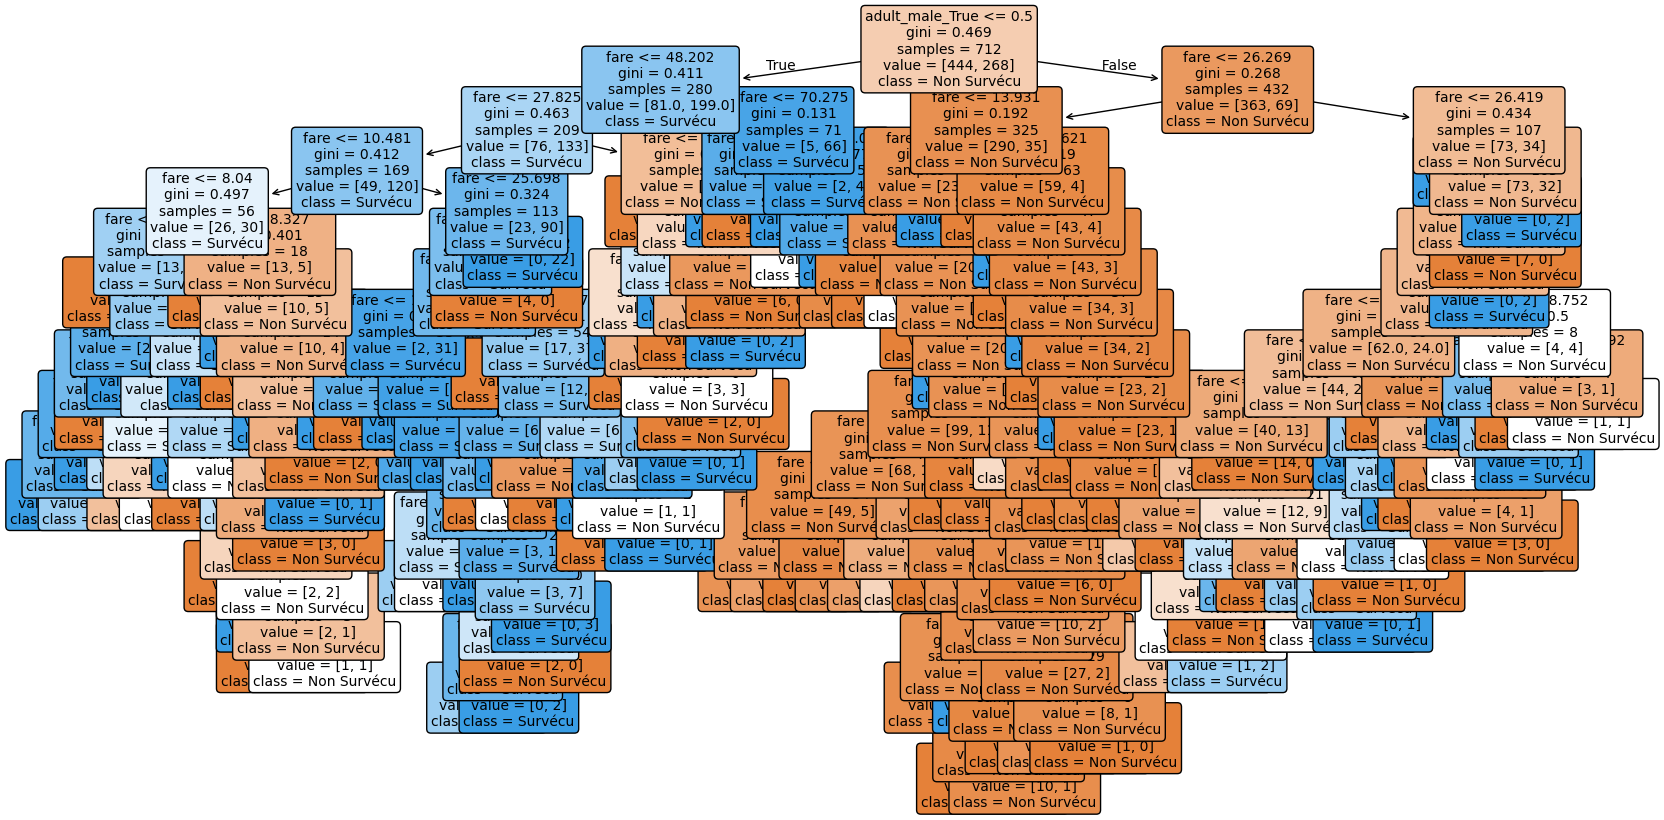

In [30]:
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(variables_qualitatives).tolist()
feature_names_encoded = cat_feature_names + variables_quantitatives

# Méthode 1 : Visualisation graphique
plt.figure(figsize=(20,10))
plot_tree(decision_tree.named_steps['classifier'], 
          feature_names= feature_names_encoded, 
          class_names=['Non Survécu', 'Survécu'],
          filled=True,  
          rounded=True, 
          fontsize=10)
plt.show()


In [31]:
# Méthode 2 : Représentation textuelle de l'arbre
tree_rules = export_text(decision_tree.named_steps['classifier'], 
                         feature_names=feature_names_encoded)
print(tree_rules)


|--- adult_male_True <= 0.50
|   |--- fare <= 48.20
|   |   |--- fare <= 27.82
|   |   |   |--- fare <= 10.48
|   |   |   |   |--- fare <= 8.04
|   |   |   |   |   |--- fare <= 6.99
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- fare >  6.99
|   |   |   |   |   |   |--- fare <= 7.74
|   |   |   |   |   |   |   |--- fare <= 7.64
|   |   |   |   |   |   |   |   |--- fare <= 7.59
|   |   |   |   |   |   |   |   |   |--- fare <= 7.24
|   |   |   |   |   |   |   |   |   |   |--- fare <= 7.23
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- fare >  7.23
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- fare >  7.24
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- fare >  7.59
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- fare >  7.64
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   | 

In [32]:
# Prédictions
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

# Calcul de la précision
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("\nPrécision sur l'ensemble d'entraînement :", precision_train)
print("Précision sur l'ensemble de test :", precision_test)
print("\nAccuracy sur l'ensemble d'entraînement :", accuracy_train)
print("Accuracy sur l'ensemble de test :", accuracy_test)
print("Rapport de Classification :\n", classification_report(y_test, y_test_pred))



Précision sur l'ensemble d'entraînement : 0.9330543933054394
Précision sur l'ensemble de test : 0.828125

Accuracy sur l'ensemble d'entraînement : 0.9143258426966292
Accuracy sur l'ensemble de test : 0.8212290502793296
Rapport de Classification :
               precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [33]:
# Visualisation de l'importance des caractéristiques
feature_names = (
    preprocessor.named_transformers_['cat'].get_feature_names_out(variables_qualitatives).tolist() + 
    variables_quantitatives
)

importances = decision_tree.named_steps['classifier'].feature_importances_
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

print("\nImportance des caractéristiques :")
print(feature_importance.head())



Importance des caractéristiques :
            feature  importance
2              fare    0.586464
1   adult_male_True    0.413536
0  adult_male_False    0.000000


Certes a l'issue de cette analyse on a de moins bonne performance sur les données d'analyse mais elles sont plus proches des données de test que la precedent. En effet nous avons 93% de precision de train sur 82% pour test ce qui est acceptable comparer aux 99% de train/71% de test du modele precedent.